# Single stock analysis example in pyfolio

Here's a simple example where we produce a set of plots, called a tear sheet, for a stock.

## Import pyfolio

In [1]:
%matplotlib inline
import pyfolio as pf

## Fetch the daily returns for a stock

In [2]:
stock_rets = pf.utils.get_symbol_rets('FB')

## Create a full tear sheet for the single stock
This will show charts about returns and shock events.

Entire data start date: 2012-05-21 00:00:00
Entire data end date: 2015-07-23 00:00:00


Backtest Months: 38
                   Backtest
sortino_ratio          1.68
omega_ratio            1.18
max_drawdown          -0.48
calmar_ratio           0.80
annual_return          0.39
stability              0.87
sharpe_ratio           0.87
annual_volatility      0.44
alpha                  0.21
beta                   0.98

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0              47.90 2012-05-21  2012-09-04    2013-07-25      309
1              22.06 2014-03-10  2014-04-28    2014-07-24       99
2              17.34 2013-10-18  2013-11-25    2013-12-17       43
4               9.21 2014-10-28  2014-11-19    2014-12-22       40
3               9.20 2015-03-24  2015-05-12    2015-06-23       66


2-sigma returns daily    -0.054
2-sigma returns weekly   -0.110
dtype: float64

Stress Events
               mean    min    max
EZB IR Event  0.002 -0.091  

/opt/miniconda/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


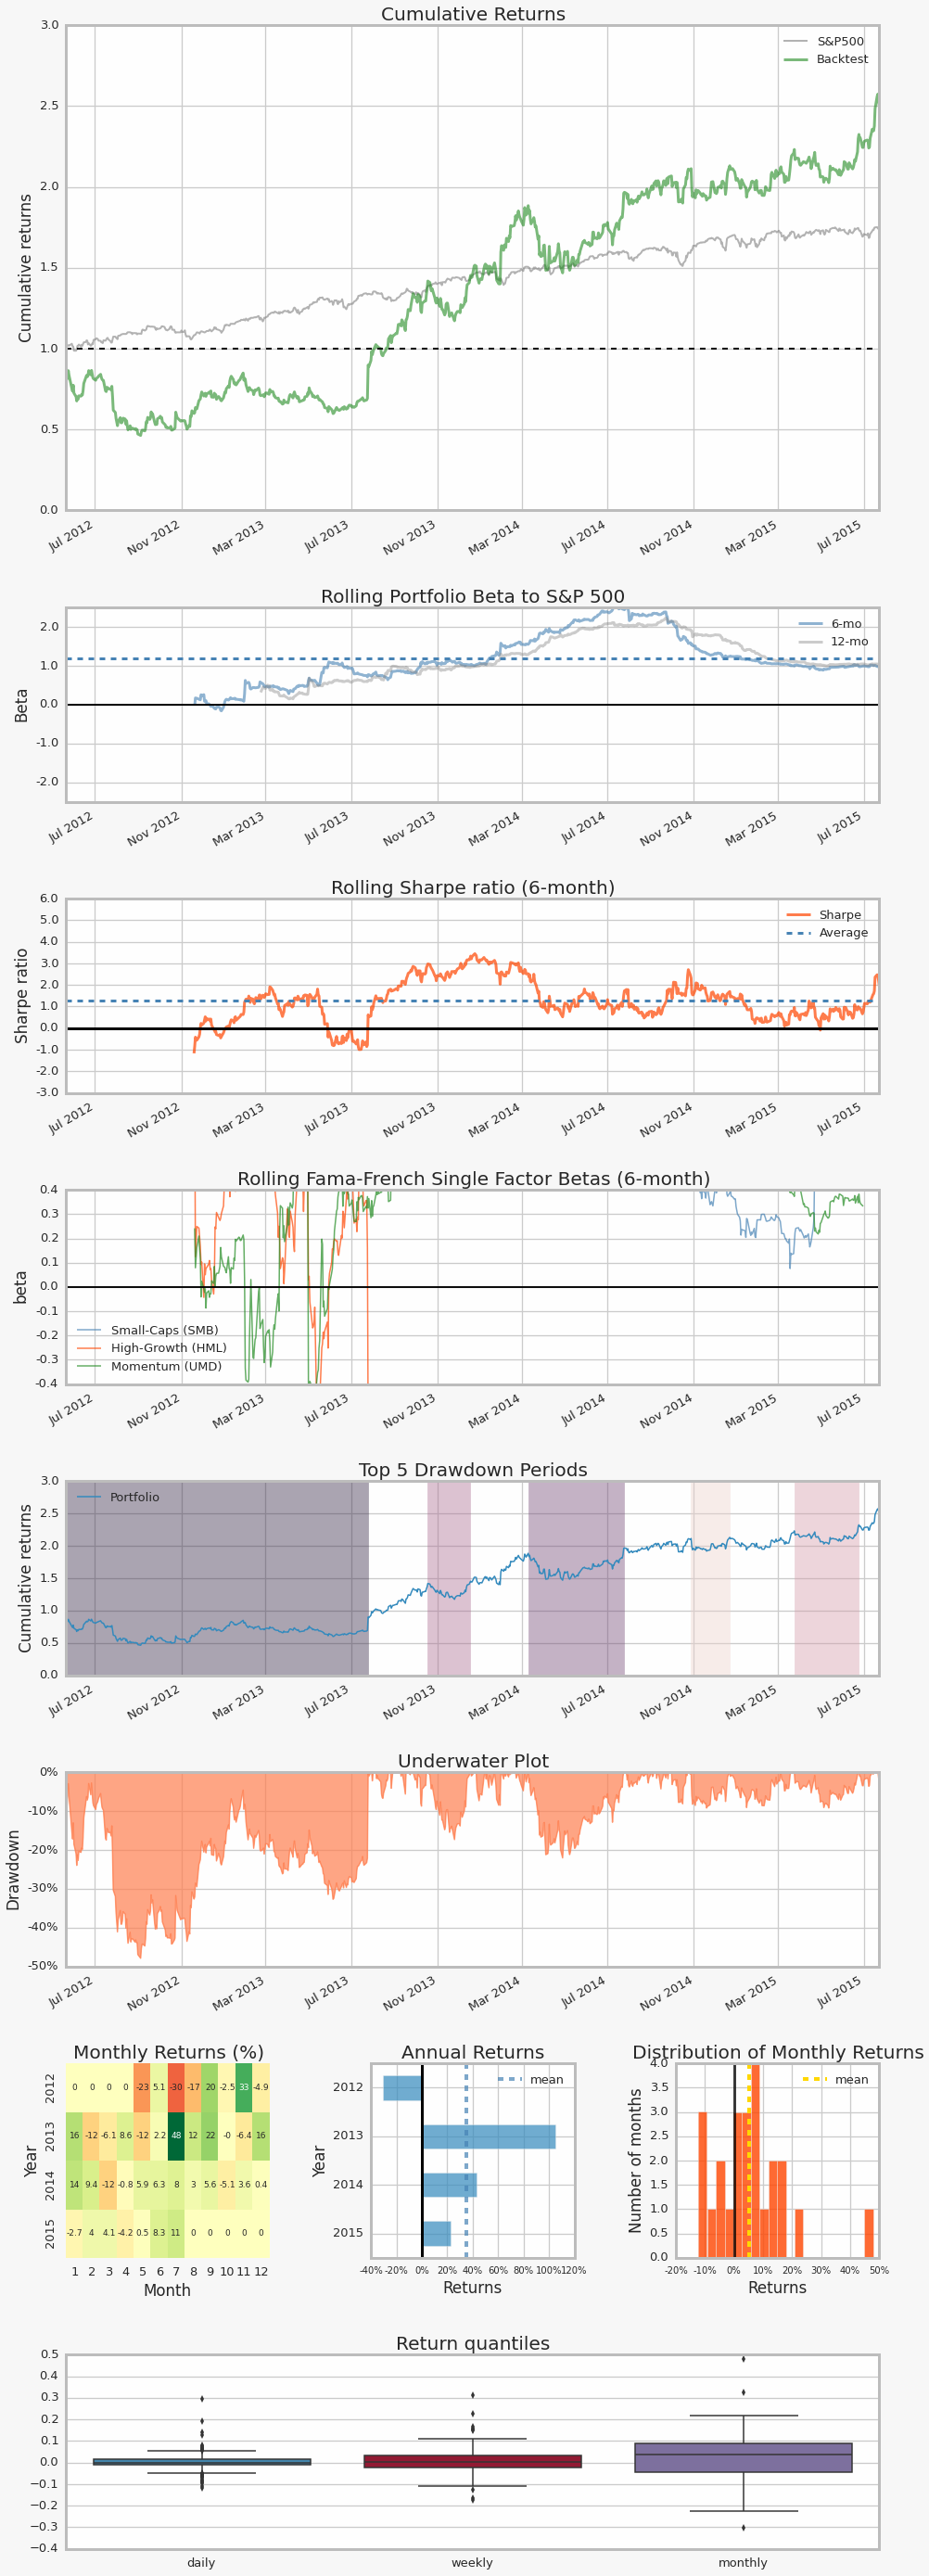

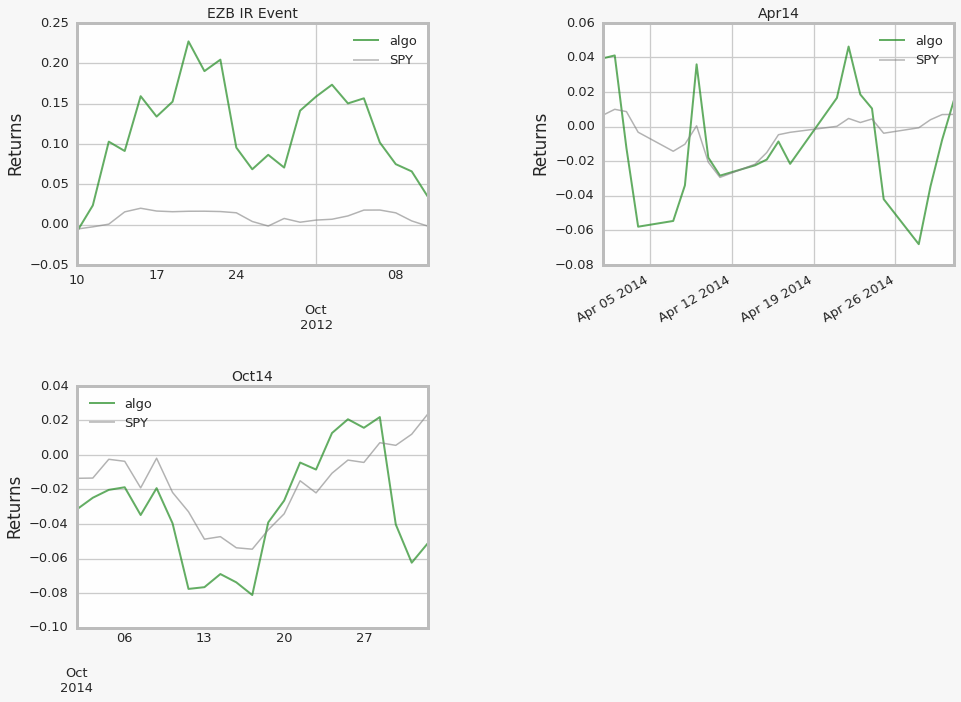

In [3]:
pf.create_full_tear_sheet(stock_rets)

## Create a full tear sheet for an equal-weight portfolio of:
* Long SPY
* Short QQQ
* Long GLD
* Long TLT

Additionally, we set the live start date as an example.

In [4]:
stock_rets_SPY = pf.utils.get_symbol_rets('SPY')
stock_rets_QQQ = pf.utils.get_symbol_rets('QQQ')
stock_rets_GLD = pf.utils.get_symbol_rets('GLD')
stock_rets_TLT = pf.utils.get_symbol_rets('TLT')

In [5]:
portfolio_4_assets_rets = pf.timeseries.portfolio_returns([stock_rets_SPY, -1 * stock_rets_QQQ, stock_rets_GLD, stock_rets_TLT], 
                                exclude_non_overlapping=True)

In [6]:
from datetime import datetime

Entire data start date: 2004-11-19 00:00:00
Entire data end date: 2015-07-23 00:00:00


Out-of-Sample Months: 32
Backtest Months: 95
                   Backtest  Out_of_Sample  All_History
sortino_ratio          1.35          -0.97         0.78
omega_ratio            1.17           0.89         1.09
max_drawdown          -0.09          -0.13        -0.13
calmar_ratio           0.70          -0.33         0.27
annual_return          0.06          -0.04         0.04
stability              0.97           0.39         0.84
sharpe_ratio           0.90          -0.69         0.52
annual_volatility      0.07           0.06         0.07
alpha                  0.07          -0.02         0.04
beta                  -0.05          -0.11        -0.05

Worst Drawdown Periods
   net drawdown in %  peak date valley date recovery date duration
0              13.06 2012-11-13  2013-12-19           NaT      NaN
2               8.96 2008-03-17  2008-08-15    2008-12-10      193
1               8.85 2008-

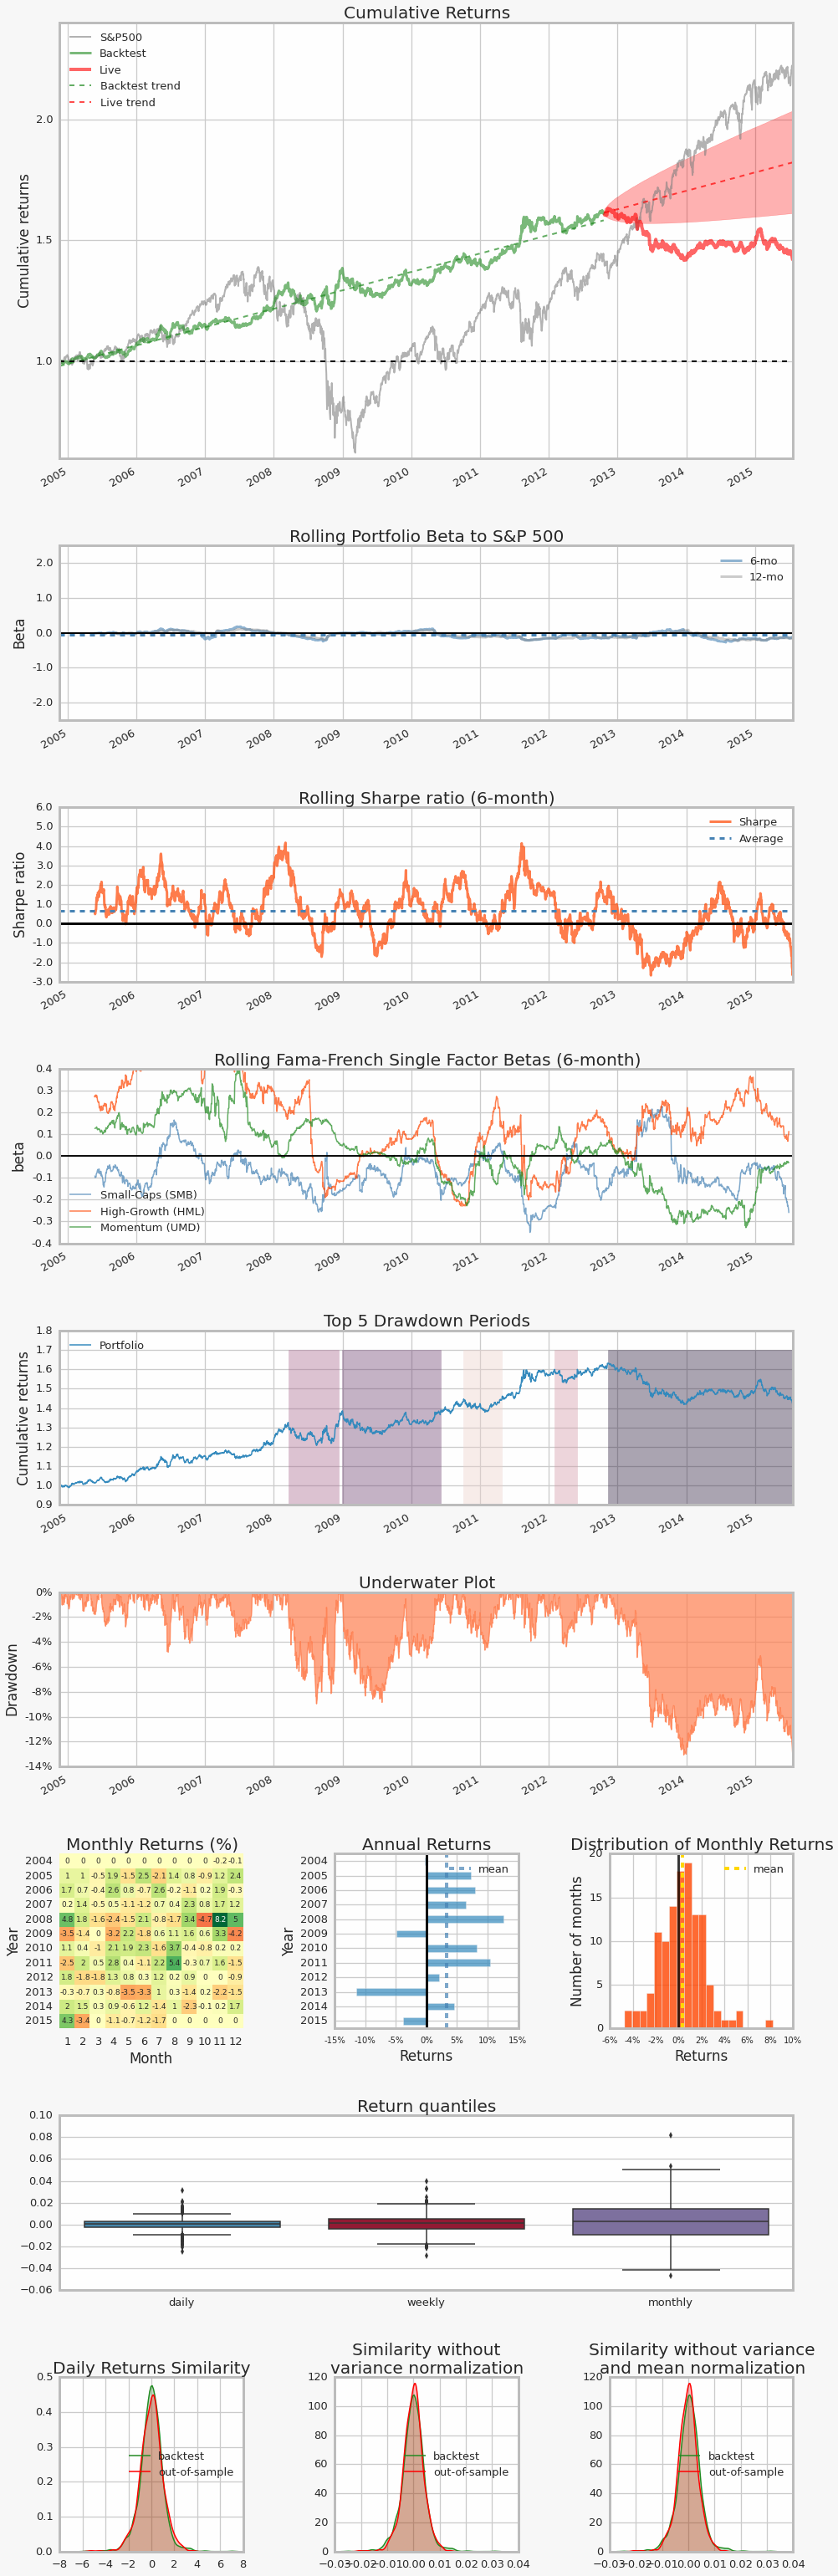

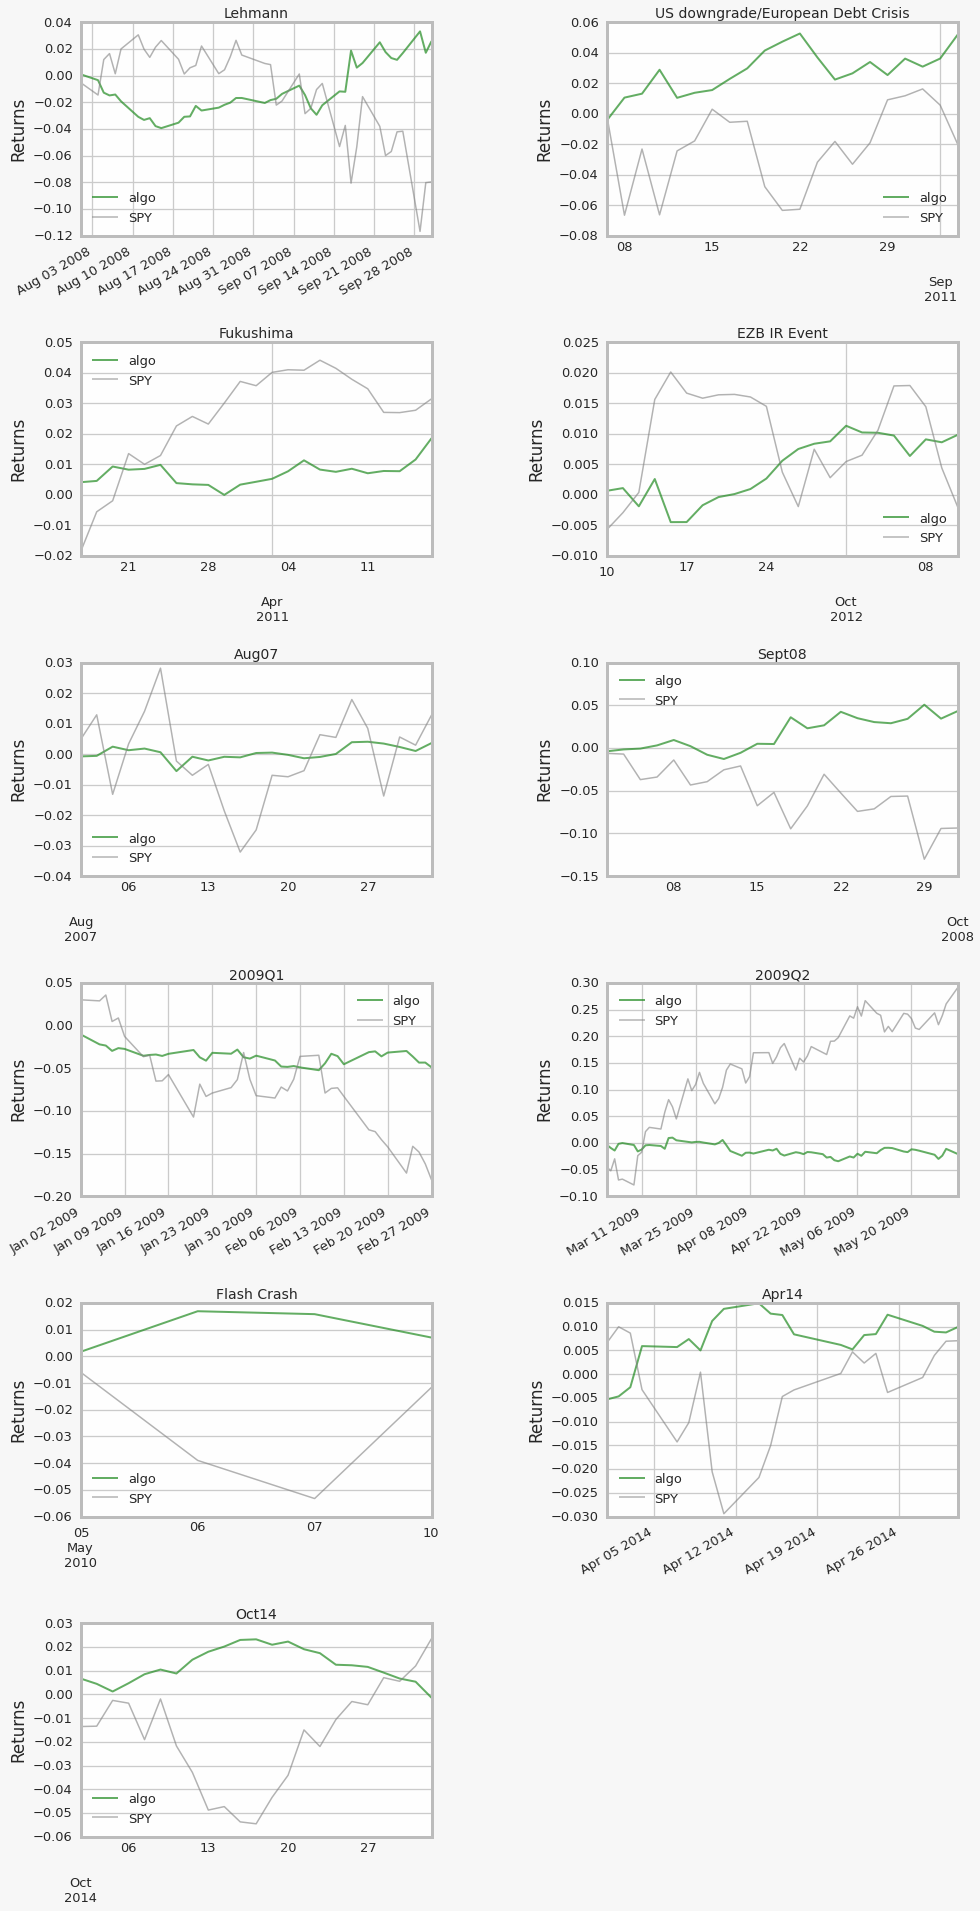

In [7]:
pf.create_full_tear_sheet(portfolio_4_assets_rets, live_start_date=datetime(2012, 10, 22))